In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

data = pd.read_csv(r"C:\PythonScripts\course-files2\housing.data",
                    sep=' +', engine='python', header=None, 
                    names=cols)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
data=data[['LSTAT','MEDV']]
data

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [11]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
outlier_condition=((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))
data_o_iqr=data[~outlier_condition.any(axis=1)]
data_o_iqr

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [19]:
X=data['LSTAT'].values.reshape(-1,1)
y=data['MEDV'].values
X_o_iqr=data_o_iqr['LSTAT'].values.reshape(-1,1)
y_o_iqr=data_o_iqr['MEDV'].values

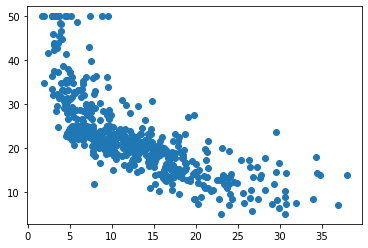

In [13]:
plt.scatter(X,y)

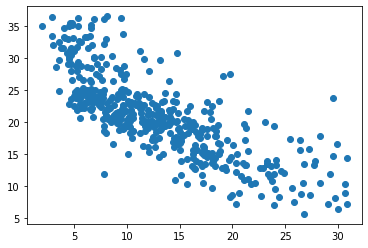

In [20]:
plt.scatter(X_o_iqr, y_o_iqr)

In [24]:
scaler=StandardScaler()
scaler.fit(X)
X_std=scaler.transform(X)

scaler2=StandardScaler()
scaler2.fit(X_o_iqr)
X_std2=scaler2.transform(X_o_iqr)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_std2, y_o_iqr, test_size=0.2)

lr=LinearRegression()
lr.fit(X_train, y_train)
lr2=LinearRegression()
lr2.fit(X_train2, y_train2)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
y_pred_train2=lr.predict(X_train2)
y_pred_test2=lr.predict(X_test2)

print('DATA')
mae_train=mean_absolute_error(y_train, y_pred_train)
mae_test=mean_absolute_error(y_test, y_pred_test)
print('MAE: train: {} test: {}'.format(mae_train, mae_test))
mse_train=mean_squared_error(y_train, y_pred_train)
mse_test=mean_squared_error(y_test, y_pred_test)
print('MSE: train: {} test: {}'.format(mse_train, mse_test))
r2_train=r2_score(y_train, y_pred_train)
r2_test=r2_score(y_test, y_pred_test)
print('R2: train: {} test: {}'.format(r2_train, r2_test))
print()
print('DATA_O_IQR')
mae_train2=mean_absolute_error(y_train2, y_pred_train2)
mae_test2=mean_absolute_error(y_test2, y_pred_test2)
print('MAE: train: {} test: {}'.format(mae_train2, mae_test2))
mse_train2=mean_squared_error(y_train2, y_pred_train2)
mse_test2=mean_squared_error(y_test2, y_pred_test2)
print('MSE: train: {} test: {}'.format(mse_train2, mse_test2))
r2_train2=r2_score(y_train2, y_pred_train2)
r2_test2=r2_score(y_test2, y_pred_test2)
print('R2: train: {} test: {}'.format(r2_train2, r2_test2))

DATA
MAE: train: 4.648742017368704 test: 4.325219203970514
MSE: train: 39.885822939135785 test: 33.292033004053046
R2: train: 0.5439380309395543 test: 0.5344280060313303

DATA_O_IQR
MAE: train: 3.8469873977480473 test: 4.219327166063074
MSE: train: 21.96205124829335 test: 27.882864957891503
R2: train: 0.45139783134767897 test: 0.35374723421982934
